# Association of Suicide Rate with Mental Health Care
Suicide is a complex issue and therefore suicide prevention efforts require coordination and collaboration among multiple sectors of society, including the health sector and other sectors such as education, labour, agriculture, business, justice, law, defense, politics, and the media. These efforts must be comprehensive and integrated as no single approach alone can make an impact on an issue as complex as suicide.

This analysis is trying to discover the association between the availability of workforce, human resources in mental health care sector with the suicide rate in the countries.

In [1]:
# ========= Import the packages =========
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

# Importing Customised Common Data Reader Class
sys.path.append(os.path.abspath('..'))
from common_lib.data_reader import SuicideDataReader, SuicideProcessedData, SuicideRawData

In [2]:
# ========= Getting Data =========

# Use common Data Reader Class to load data
data_reader = SuicideDataReader()

# Load Suicide Rate data
suicide_rate_data = data_reader.read_data(SuicideProcessedData.SUICIDE_RATES)
suicide_rate_data

# Load Human Resource data
hr_data = data_reader.read_data(SuicideRawData.HUMAN_RESOURCES)

In [3]:
# ========= Prepare Data =========
# Filter the suicide rate data with columns - country, all_age and sex only
suicide_rate_dataframe = suicide_rate_data[["country", "all_age", "sex"]]
#suicide_rate_dataframe

# Merge the two dataframes for plotting purpose
merged_dataframe = pd.merge(suicide_rate_dataframe, hr_data, on="country")
merged_dataframe.head()

,country,all_age,sex,year,psychiatrists,nurses,social_workers,psychologists
0,Afghanistan,93.2,Both sexes,2016,0.231,0.098,NaN,0.296
1,Afghanistan,157.1,Male,2016,0.231,0.098,NaN,0.296
2,Afghanistan,35.1,Female,2016,0.231,0.098,NaN,0.296
3,Albania,65.1,Both sexes,2016,1.471,6.876,1.06,1.231
4,Albania,86.3,Male,2016,1.471,6.876,1.06,1.231


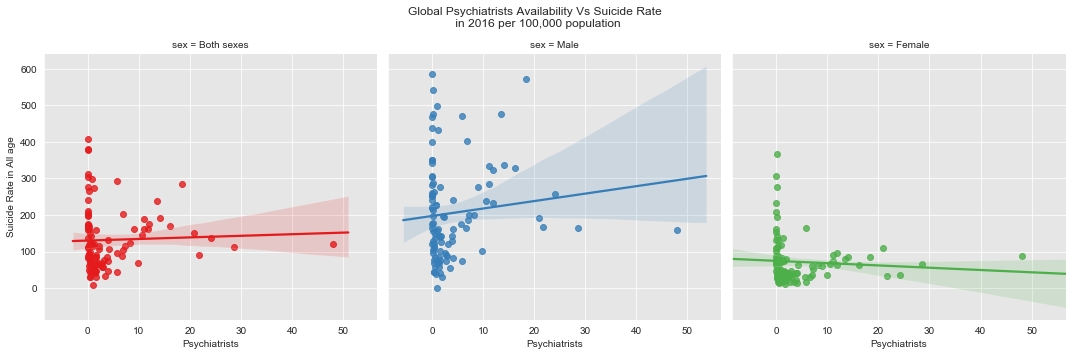

In [10]:
# ========= Plotting (1) =========
#Plotting to visualise the association between Suicide rate of All age and Psychiatrists

# setting style
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

# https://seaborn.pydata.org/tutorial/aesthetics.html
# https://seaborn.pydata.org/generated/seaborn.lmplot.html

plot_psy = sns.lmplot(data= merged_dataframe, x="psychiatrists", y= "all_age", palette="Set1", col="sex", hue="sex")
plot_psy.set_axis_labels("Psychiatrists", "Suicide Rate in All age")

# This is to adjust the axis and display the main title
# without it, seaborn"s facet titles and the main title are overlapped
plt.subplots_adjust(top=0.85)
plot_psy.fig.suptitle("Global Psychiatrists Availability Vs Suicide Rate \n in 2016 per 100,000 population")
plt.show()

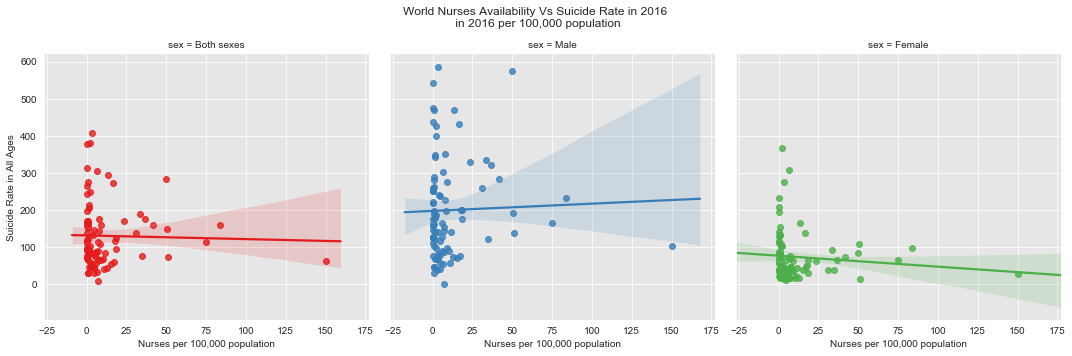

In [11]:
# ========= Plotting (2) =========
# Plotting to to see the association between Suicide rate of All age and Nurses among Sexes

plot_nurses = sns.lmplot(data= merged_dataframe, x="nurses", y= "all_age", palette="Set1", col="sex", hue="sex") 
plot_nurses.set_axis_labels("Nurses per 100,000 population", "Suicide Rate in All Ages")

# This is to adjust the axis and display the main title
# without it, seaborn"s facet titles and the main title are overlapped
plt.subplots_adjust(top=0.85)
plot_nurses.fig.suptitle("World Nurses Availability Vs Suicide Rate in 2016 \n in 2016 per 100,000 population")

plt.show()

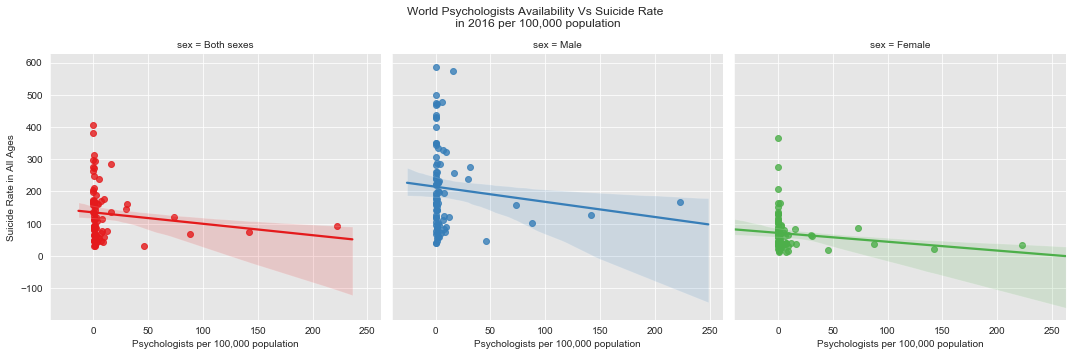

In [13]:
# ========= Plotting (3) =========
#Plotting to visualise the association between Suicide rate of All age and Psychiatrists among Sexes

plot_psy = sns.lmplot(data= merged_dataframe, x="psychologists", y= "all_age", palette="Set1", col="sex", hue="sex") 
plot_psy.set_axis_labels("Psychologists per 100,000 population", "Suicide Rate in All Ages")

# This is to adjust the axis and display the main title
# without it, seaborn"s facet titles and the main title are overlapped
plt.subplots_adjust(top=0.85)
plot_psy.fig.suptitle("World Psychologists Availability Vs Suicide Rate \n in 2016 per 100,000 population")

plt.show()